### import Triple Gods

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
import opendatasets as od

# Prepare Data

In [9]:
od.download(
	"https://www.kaggle.com/datasets/joebeachcapital/tuandromd")


Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/tuandromd


100%|██████████| 74.6k/74.6k [00:00<00:00, 262kB/s]

In [10]:
import os

dataset_path = os.getcwd() + "/tuandromd/TUANDROMD.csv"

In [11]:
df_malwar =  pd.read_csv(dataset_path)

In [12]:
df_malwar.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [13]:
df_malwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB


In [14]:
df_malwar.shape

(4465, 242)

In [15]:
df_malwar.describe()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.051971,0.173163,0.245520,0.215950,0.091622,0.088710,0.056228,0.133065,0.013665,0.150090
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.221994,0.378431,0.430443,0.411526,0.288524,0.284356,0.230387,0.339682,0.116108,0.357199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
all(df_malwar.isnull().count() == df_malwar.shape[0])

True

In [17]:
all(df_malwar.isna().count() == df_malwar.shape[0])

True

In [18]:
#checking values
for col in range(df_malwar.shape[1]-1):
    
    feature_name = df_malwar.iloc[:,col].name

    print(f"{feature_name} value count is : {df_malwar[feature_name].value_counts().count()} \n {df_malwar[feature_name].value_counts()}")

    print("------------------------")

ACCESS_ALL_DOWNLOADS value count is : 2 
 ACCESS_ALL_DOWNLOADS
0.0    4460
1.0       4
Name: count, dtype: int64
------------------------
ACCESS_CACHE_FILESYSTEM value count is : 2 
 ACCESS_CACHE_FILESYSTEM
0.0    4460
1.0       4
Name: count, dtype: int64
------------------------
ACCESS_CHECKIN_PROPERTIES value count is : 2 
 ACCESS_CHECKIN_PROPERTIES
0.0    4442
1.0      22
Name: count, dtype: int64
------------------------
ACCESS_COARSE_LOCATION value count is : 2 
 ACCESS_COARSE_LOCATION
0.0    4092
1.0     372
Name: count, dtype: int64
------------------------
ACCESS_COARSE_UPDATES value count is : 2 
 ACCESS_COARSE_UPDATES
0.0    4433
1.0      31
Name: count, dtype: int64
------------------------
ACCESS_FINE_LOCATION value count is : 2 
 ACCESS_FINE_LOCATION
0.0    4072
1.0     392
Name: count, dtype: int64
------------------------
ACCESS_LOCATION_EXTRA_COMMANDS value count is : 2 
 ACCESS_LOCATION_EXTRA_COMMANDS
0.0    4362
1.0     102
Name: count, dtype: int64
-----------------

In [19]:
df_malwar.dropna(inplace=True)

In [20]:
import random
ls = random.choices(range(df_malwar.shape[1]-1) , k =9)
list(enumerate(ls))

[(0, 155),
 (1, 89),
 (2, 157),
 (3, 191),
 (4, 237),
 (5, 165),
 (6, 79),
 (7, 9),
 (8, 76)]

In [21]:
df_malwar.iloc[:,0].value_counts().shape[0]

2

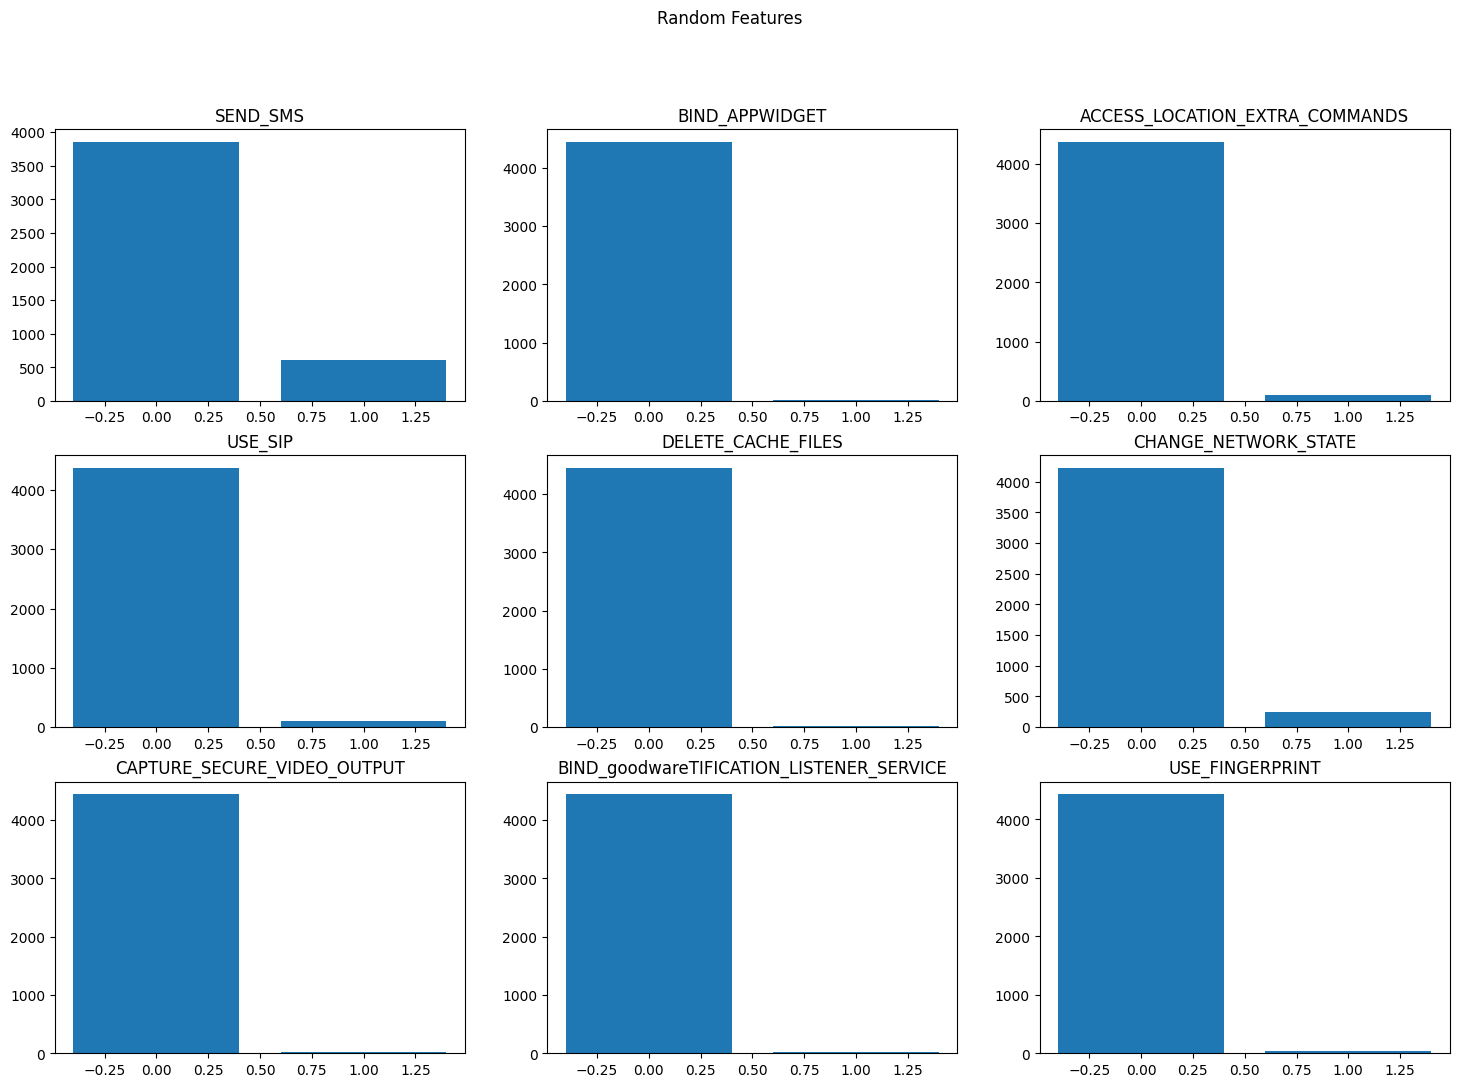

In [22]:
random.seed(42)
rows = 3
cols = 3
fig , ax = plt.subplots(rows,cols,figsize = (18,12))
for i in range(rows):
    
    for j in range(cols):
        num = random.choice(range(df_malwar.shape[1]-1))
        
        ax[i , j].bar([0,1],
                      [df_malwar.iloc[:,num].value_counts()[0],
                       0 if df_malwar.iloc[:,num].value_counts().shape[0]==1 else df_malwar.iloc[:,num].value_counts()[1]])
        ax[i,j].set_title(df_malwar.iloc[:,num].name)
        
fig.suptitle("Random Features")
plt.subplots_adjust()

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df_malwar["Label"] = lb.fit_transform(df_malwar["Label"].astype(str))

In [24]:
X_train, X_test, y_train, y_test =  train_test_split(df_malwar.drop("Label",axis=1),df_malwar["Label"],test_size=0.25)

In [25]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3348, 241), (1116, 241), (3348,), (1116,))

In [26]:
print(f"y test value count is : {y_test.value_counts().count()} \n y test value : {y_test.value_counts()}")

y test value count is : 2 
 y test value : Label
1    871
0    245
Name: count, dtype: int64


# Train with SVC 

In [27]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train,y_train)

SVC()

In [28]:
svc_model.score(X_test,y_test)

0.9874551971326165

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, svc_model.predict(X_test)))

print(f"accuracy score : {accuracy_score(y_test , svc_model.predict(X_test))}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       245
           1       0.99      0.99      0.99       871

    accuracy                           0.99      1116
   macro avg       0.98      0.98      0.98      1116
weighted avg       0.99      0.99      0.99      1116

accuracy score : 0.9874551971326165


In [30]:
y_test[:5] , svc_model.predict(X_test)[:5]

(3050    0
 364     1
 2176    1
 3233    1
 4463    0
 Name: Label, dtype: int64,
 array([0, 1, 1, 1, 0]))

In [31]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([0.9880597 , 0.99104478, 0.9880597 , 0.98208955, 0.99104478,
       0.9761194 , 0.9880597 , 0.99402985, 0.99101796, 0.99401198])

In [32]:
accuracy_score(y_test , svc_model.predict(X_test))

0.9874551971326165

## Deleting imbalance features

In [33]:
cols = { cols for cols in df_malwar.columns if df_malwar[cols].value_counts().shape[0] ==2}
cols , len(cols)

({'ACCESS_ALL_DOWNLOADS',
  'ACCESS_CACHE_FILESYSTEM',
  'ACCESS_CHECKIN_PROPERTIES',
  'ACCESS_COARSE_LOCATION',
  'ACCESS_COARSE_UPDATES',
  'ACCESS_FINE_LOCATION',
  'ACCESS_LOCATION_EXTRA_COMMANDS',
  'ACCESS_MOCK_LOCATION',
  'ACCESS_MTK_MMHW',
  'ACCESS_NETWORK_STATE',
  'ACCESS_SUPERUSER',
  'ACCESS_SURFACE_FLINGER',
  'ACCESS_WIFI_STATE',
  'ACCOUNT_MANAGER',
  'ADD_VOICEMAIL',
  'AUTHENTICATE_ACCOUNTS',
  'BATTERY_STATS',
  'BILLING',
  'BIND_ACCESSIBILITY_SERVICE',
  'BIND_APPWIDGET',
  'BIND_CARRIER_MESSAGING_SERVICE',
  'BIND_DEVICE_ADMIN',
  'BIND_DREAM_SERVICE',
  'BIND_INPUT_METHOD',
  'BIND_NFC_SERVICE',
  'BIND_PRINT_SERVICE',
  'BIND_REMOTEVIEWS',
  'BIND_TEXT_SERVICE',
  'BIND_TV_INPUT',
  'BIND_VOICE_INTERACTION',
  'BIND_VPN_SERVICE',
  'BIND_WALLPAPER',
  'BIND_goodwareTIFICATION_LISTENER_SERVICE',
  'BLUETOOTH',
  'BLUETOOTH_ADMIN',
  'BLUETOOTH_PRIVILEGED',
  'BODY_SENSORS',
  'BRICK',
  'BROADCAST_PACKAGE_REMOVED',
  'BROADCAST_SMS',
  'BROADCAST_STICKY',
  'BR

In [34]:
df_new = pd.DataFrame(df_malwar,columns=list(cols))
df_new.shape

(4464, 200)

In [35]:
X_train_new, X_test_new, y_train_new, y_test_new =  train_test_split(df_new.drop("Label",axis=1),df_new["Label"],test_size=0.25)

In [36]:
new_svc = svc_model.fit(X_train_new,y_train_new)
new_svc.score(X_test_new,y_test_new)

0.9901433691756273

In [37]:
from sklearn.model_selection import cross_val_score
clf_new = SVC(kernel='linear', C=1, random_state=42)
scores_new = cross_val_score(clf, X_train_new, y_train_new, cv=10)
scores_new

array([0.97910448, 0.99104478, 0.97313433, 0.99402985, 0.98208955,
       0.99104478, 0.97910448, 0.99402985, 0.99101796, 0.96706587])